In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('orignal_data.csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data

,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//,https,digits,letters,Shortining_Service,having_ip_address,long_url_phishing,hyphen_in_url,subdomains,subdomain_length,subdomain_count,subdomain_len_binary,url_entropy,cont_login,cont_verify,cont_update,cont_secure,cont_account,cont_bank,cont_signin,char_count,char_ratio,file_extension,file_extension_len,ex_char_count,ex_num,url_depth,tld,has_www
0,br-icloud.com.br,phishing,1.0,16.0,br-icloud.com.br,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,0.0,1.0,br-icloud,9.0,1.0,1.0,3.375000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.187500,.br,3.0,1.0,0.0,0.0,br,0.0
1,mp3raid.com/music/krizz_kaliko.html,benign,0.0,35.0,mp3raid.com,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,29.0,0.0,0.0,0.0,0.0,none,0.0,0.0,0.0,4.079143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.142857,.html,5.0,1.0,0.0,2.0,com,0.0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0.0,31.0,bopsecrets.org,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,25.0,0.0,0.0,0.0,0.0,none,0.0,0.0,0.0,3.708093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.161290,.htm,4.0,1.0,0.0,3.0,org,0.0
3,http://www.garage-pirenne.be/index.php?option=...,phishing,1.0,88.0,www.garage-pirenne.be,0.0,1.0,1.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.0,63.0,0.0,0.0,1.0,1.0,www,3.0,1.0,0.0,4.660343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.204545,.php?option=com_content&view=article&id=70&vsi...,54.0,11.0,1.0,1.0,be,1.0
4,http://adventure-nicaragua.net/index.php?optio...,phishing,1.0,235.0,adventure-nicaragua.net,0.0,1.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,22.0,199.0,0.0,0.0,1.0,1.0,none,0.0,0.0,0.0,5.491293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.059574,.php?option=com_mailto&tmpl=component&link=aHR...,199.0,8.0,1.0,1.0,net,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493228,http://www.primariaaxente.ro/index.php?option=...,phishing,1.0,118.0,www.primariaaxente.ro,0.0,1.0,1.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,92.0,0.0,0.0,1.0,1.0,www,3.0,1.0,0.0,4.590211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.177966,.php?option=com_content&view=article&id=84:act...,84.0,15.0,1.0,1.0,ro,1.0
493229,http://solenardelli.com/index.php?option=com_k...,phishing,1.0,105.0,solenardelli.com,0.0,1.0,0.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,83.0,0.0,0.0,1.0,0.0,none,0.0,0.0,0.0,4.625365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.180952,.php?option=com_k2&view=itemlist&layout=catego...,76.0,14.0,1.0,1.0,com,0.0
493230,local.yahoo.com/info-10492970-menard-brenda-ch...,benign,0.0,80.0,local.yahoo.com,0.0,0.0,8.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,61.0,0.0,0.0,1.0,1.0,local,5.0,1.0,1.0,4.439388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.137500,none,4.0,0.0,0.0,1.0,com,0.0
493231,absoluteastronomy.com/topics/Willis_Bouchey,benign,0.0,43.0,absoluteastronomy.com,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39.0,0.0,0.0,0.0,0.0,none,0.0,0.0,0.0,4.158141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.093023,none,4.0,0.0,0.0,2.0,com,0.0


In [ ]:
data = data.dropna()

In [ ]:
# 특성과 레이블 분리
X = data.drop(['Category', 'url', 'type', 'domain', 'subdomains', 'file_extension', 'tld'], axis=1)
y = data['Category']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import recall_score, classification_report

In [ ]:
models = {
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': make_pipeline(StandardScaler(), SVC(probability=True)),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': make_pipeline(StandardScaler(), KNeighborsClassifier()),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'MLP': make_pipeline(StandardScaler(), MLPClassifier(max_iter=500, random_state=42))
}

# 결과를 저장할 딕셔너리
results = {}

# 각 모델을 학습시키고 평가ㅠ
for name, model in models.items():
    # 모델 학습
    model.fit(X_train, y_train)
    # 모델 예측
    y_pred = model.predict(X_test)
    # Recall 계산
    recall = recall_score(y_test, y_pred)
    results[name] = recall
    # 평가 지표 출력
    print(f'{name} Recall: {recall}')
    print(classification_report(y_test, y_pred))

# 최종 결과 출력
print("Recall Scores for All Models:")
for name, recall in results.items():
    print(f'{name}: {recall}')

Logistic Regression Recall: 0.9368851843508298
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     72010
         1.0       0.96      0.94      0.95     26634

    accuracy                           0.97     98644
   macro avg       0.97      0.96      0.96     98644
weighted avg       0.97      0.97      0.97     98644

Random Forest Recall: 0.9941803709544191
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     72010
         1.0       1.00      0.99      1.00     26634

    accuracy                           1.00     98644
   macro avg       1.00      1.00      1.00     98644
weighted avg       1.00      1.00      1.00     98644

SVM Recall: 0.981677555004881
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     72010
         1.0       0.99      0.98      0.99     26634

    accuracy                           0.99     98644
   macro a

LightGBMError: Do not support special JSON characters in feature name.

Random Forest

Recall: 0.9942

Decision Tree

Recall: 0.9940

XGBoost

Recall: 0.9927

검증 단계
- 5-Fold Cross-Validation Recall Scores: 각 폴드에 대한  Recall 값.
- Mean Recall: 교차 검증의 평균 Recall 값.
- Recall: 테스트 데이터에서의 Recall 값.
- Confusion Matrix: 혼동 행렬 (TP, FP, TN, FN 값).
- AUC: ROC 곡선 아래의 면적 값.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

Random Forest 5-Fold Cross-Validation Recall Scores: [0.99440158 0.99510749 0.9952484  0.99449567 0.99440158]
Random Forest Mean Recall: 0.9947309455448439
Random Forest Recall: 0.9941803709544191
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     72010
         1.0       1.00      0.99      1.00     26634

    accuracy                           1.00     98644
   macro avg       1.00      1.00      1.00     98644
weighted avg       1.00      1.00      1.00     98644

Random Forest Confusion Matrix:
[[71945    65]
 [  155 26479]]

Random Forest AUC: 0.999580938792084

Decision Tree 5-Fold Cross-Validation Recall Scores: [0.99416635 0.9946841  0.99458976 0.99397817 0.99251976]
Decision Tree Mean Recall: 0.9939876299952571
Decision Tree Recall: 0.9940301869790493
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     72010
         1.0       0.99      0.99      0.99     26634

    accuracy 

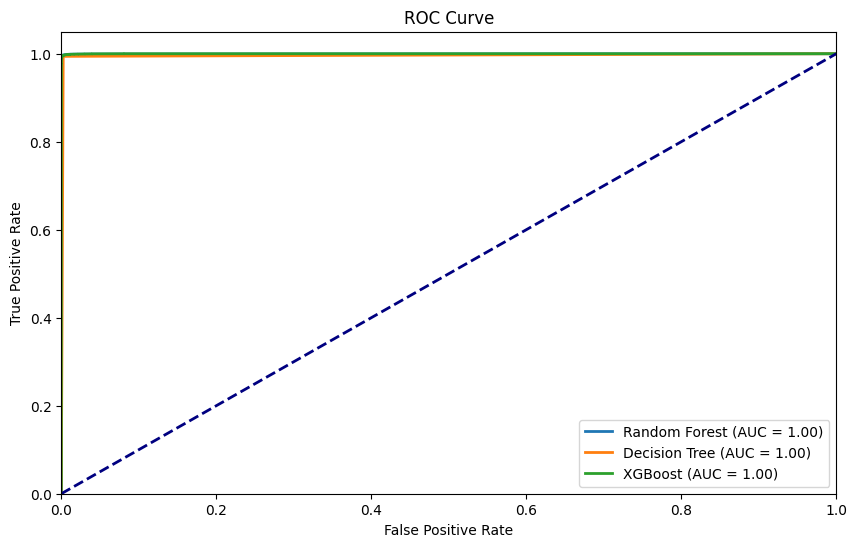

,Random Forest,Decision Tree,XGBoost
Recall,0.99418,0.99403,0.992716


In [ ]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# 검증 결과를 저장할 딕셔너리
results = {}
confusion_matrices = {}
roc_data = {}

# 각 모델을 검증
for name, model in models.items():
    # 교차 검증 수행
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')
    print(f'{name} 5-Fold Cross-Validation Recall Scores: {cv_scores}')
    print(f'{name} Mean Recall: {cv_scores.mean()}')

    # 모델 학습 및 예측ㅠ
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Recall 및 분류 보고서
    recall = recall_score(y_test, y_pred)
    results[name] = recall
    print(f'{name} Recall: {recall}')
    print(classification_report(y_test, y_pred))

    # 혼동 행렬
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm
    print(f'{name} Confusion Matrix:\n{cm}\n')

    # ROC 곡선 및 AUC
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = (fpr, tpr, roc_auc)
    print(f'{name} AUC: {roc_auc}\n')

# ROC 곡선 시각화
plt.figure(figsize=(10, 6))
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 결과 저장
results_df = pd.DataFrame(results, index=['Recall'])
results_df

세 모델 모두 피싱 웹사이트 탐지에서 높은 성능을 보여줌.
특히, 랜덤 포레스트와 XGBoost 모델은 매우 높은 Recall과 AUC 값을 기록하며, 피싱 사이트를 효과적으로 탐지할 수 있음.
그러나 Decision Tree는 상대적으로 낮은 AUC를 기록했지만 여전히 좋은 성능을 보임

Random Forest Confusion Matrix
True Positive (TP): 26,479 (피싱 사이트로 올바르게 예측된 경우)
True Negative (TN): 71,945 (정상 사이트로 올바르게 예측된 경우)
False Positive (FP): 65 (정상 사이트를 피싱 사이트로 잘못 예측한 경우)
False Negative (FN): 155 (피싱 사이트를 정상 사이트로 잘못 예측한 경우)

--------------
Decision Tree Confusion Matrix

True Positive (TP): 26,475
True Negative (TN): 71,831
False Positive (FP): 179
False Negative (FN): 159

--------------------------
XGBoost Confusion Matrix

True Positive (TP): 26,440
True Negative (TN): 71,945
False Positive (FP): 65
False Negative (FN): 194

In [ ]:
### 클래스 불균형 봐야함
class_counts = y.value_counts()
print(class_counts)

plt.figure(figsize=(6, 4))
sns.barplot(class_counts.index, class_counts.values, alpha=0.8)
plt.title('Class Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.show()

Category
0.0    360301
1.0    132915
Name: count, dtype: int64


TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 600x400 with 0 Axes>

In [ ]:
from imblearn.over_sampling import SMOTE

# 오버샘플링 적용
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print(f'Before resampling: {y_train.value_counts()}')
print(f'After resampling: {y_res.value_counts()}')

# 모델 학습 및 평가
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)

# 평가 결과 출력
recall = recall_score(y_test, y_pred)
print(f'Recall after SMOTE: {recall}')
print(classification_report(y_test, y_pred))

Before resampling: Category
0.0    288291
1.0    106281
Name: count, dtype: int64
After resampling: Category
0.0    288291
1.0    288291
Name: count, dtype: int64
Recall after SMOTE: 0.9947060148682135
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     72010
         1.0       1.00      0.99      1.00     26634

    accuracy                           1.00     98644
   macro avg       1.00      1.00      1.00     98644
weighted avg       1.00      1.00      1.00     98644



클래스 불균형 해결: SMOTE를 통해 클래스 불균형이 해소,
- 피싱 사이트 탐지 성능이 개선되었습니다. 특히, 피싱 사이트에 대한 Recall이 0.9947로 매우 높은 값을 기록

- 전체적으로 모델의 Precision, Recall, F1-Score가 모두 1.00에 근접하거나 1.00을 기록하여, 모델이 매우 높은 예측 성능을 보였음을 알 수 있음

- False Negative 최소화: 피싱 사이트를 정상 사이트로 잘못 분류하는 False Negative의 수가 매우 적어, 피싱 탐지의 신뢰성을 높임

결론
SMOTE를 적용한 결과, 데이터셋의 불균형 문제를 성공적으로 해결하고, 모델의 피싱 사이트 탐지 성능을 크게 향상시킴

- 모델은 피싱 사이트를 거의 놓치지 않고 탐지할 수 있게 됨. !

In [ ]:
import pickle

# 모델을 파일로 저장
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
df1 = pd.read_csv('new_datas.csv')

In [ ]:
df1

,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//,https,digits,letters,Shortining_Service,having_ip_address,long_url_phishing,hyphen_in_url,subdomains,subdomain_length,subdomain_count,subdomain_len_binary,url_entropy,cont_login,cont_verify,cont_update,cont_secure,cont_account,cont_bank,cont_signin,char_count,char_ratio,file_extension,file_extension_len,ex_char_count,ex_num,url_depth,tld,has_www
0,.southbankmosaics.com,phishing,1,21,southbankmosaics.com,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,19,0,0,0,0,none,0,0,0,3.558519,0,0,0,0,0,1,0,2,0.095238,.com,4,1,0,0,com,0
1,.uni-mainz.de,phishing,1,13,uni-mainz.de,0,0,1,0,2,0,0,0,0,0,0,0,0,1,0,10,0,0,0,1,none,0,0,0,3.238901,0,0,0,0,0,0,0,3,0.230769,.de,3,1,0,0,de,0
2,.voicefmradio.co.uk,phishing,1,19,voicefmradio.co.uk,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0,16,0,0,0,0,voicefmradio,12,1,1,3.536887,0,0,0,0,0,0,0,3,0.157895,.uk,3,1,0,0,uk,0
3,.sfnmjournal.com,phishing,1,16,sfnmjournal.com,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,14,0,0,0,0,none,0,0,0,3.500000,0,0,0,0,0,0,0,2,0.125000,.com,4,1,0,0,com,0
4,.rewildingargentina.org,phishing,1,23,rewildingargentina.org,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,21,0,0,0,0,none,0,0,0,3.435755,0,0,0,0,0,0,0,2,0.086957,.org,4,1,0,0,org,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,.skincareliving.com,phishing,1,19,skincareliving.com,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,17,0,0,0,0,none,0,0,0,3.681881,0,0,0,0,0,0,0,2,0.105263,.com,4,1,0,0,com,0
235791,.winchester.gov.uk,phishing,1,18,winchester.gov.uk,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0,15,0,0,0,0,winchester,10,1,1,3.794653,0,0,0,0,0,0,0,3,0.166667,.uk,3,1,0,0,uk,0
235792,.nononsensedesign.be,phishing,1,20,nononsensedesign.be,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,18,0,0,0,0,none,0,0,0,2.903702,0,0,0,0,0,0,0,2,0.100000,.be,3,1,0,0,be,0
235793,patient-cell-40f5.updatedlogmylogin.workers.dev/,benign,0,48,patient-cell-40f5.updatedlogmylogin.workers.dev,0,0,2,0,3,0,0,0,0,0,0,0,0,1,3,39,0,0,0,1,patient-cell-40f5.updatedlogmylogin,34,2,1,4.488521,1,0,1,0,0,0,0,6,0.125000,none,4,0,0,1,dev,0


In [ ]:
import pickle
with open('random_forest_model.pkl', 'rb') as f:
  loaded_model = pickle.load(f)


In [ ]:
df1.dropna(inplace = True)

In [ ]:
new_data_preprocessed = df1.drop(['url', 'type', 'domain', 'subdomains', 'file_extension', 'tld'], axis=1, errors='ignore')

In [ ]:
new_data_preprocessed.drop(columns ='Category', inplace = True)

In [ ]:
new_predictions = loaded_model.predict(new_data_preprocessed)

# 예측 결과 출력
print(new_predictions)

[1. 1. 1. ... 1. 0. 1.]


In [ ]:
df1['Prediction'] = new_predictions

In [ ]:
print(df1[['url','Category','Prediction']])

                                                     url  Category  Prediction
0                                  .southbankmosaics.com         1         1.0
1                                          .uni-mainz.de         1         1.0
2                                    .voicefmradio.co.uk         1         1.0
3                                       .sfnmjournal.com         1         1.0
4                                .rewildingargentina.org         1         1.0
...                                                  ...       ...         ...
235790                               .skincareliving.com         1         1.0
235791                                .winchester.gov.uk         1         1.0
235792                              .nononsensedesign.be         1         1.0
235793  patient-cell-40f5.updatedlogmylogin.workers.dev/         0         0.0
235794                           .alternativefinland.com         1         1.0

[235742 rows x 3 columns]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# 실제 값과 예측 값
true_labels = df1['Category']
predictions = df1['Prediction']

# 평가 결과 출력
report = classification_report(true_labels, predictions)
confusion = confusion_matrix(true_labels, predictions)

print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.46      0.63    100896
           1       0.71      1.00      0.83    134846

    accuracy                           0.77    235742
   macro avg       0.86      0.73      0.73    235742
weighted avg       0.84      0.77      0.75    235742

Confusion Matrix:
 [[ 46718  54178]
 [     0 134846]]


## Precision:
- Class 0 (정상 사이트): 1.00
- Class 1 (피싱 사이트): 0.71
설명: Precision은 양성 예측 중에서 실제로 양성인 비율을 나타냄.
정상 사이트에 대한 Precision은 매우 높지만, 피싱 사이트에 대한 Precision은 상대적으로 낮음 이는 피싱 사이트로 예측된 것 중 일부가 실제로는 정상 사이트일 수 있음을 의미함
## Recall:
Class 0 (정상 사이트): 0.46
Class 1 (피싱 사이트): 1.00
설명: Recall은 실제 양성 중에서 모델이 양성으로 예측한 비율을 나타냄. 피싱 사이트에 대한 Recall은 매우 높아 피싱 사이트를 놓치지 않았으나, 정상 사이트에 대한 Recall은 매우 낮음. 이는 많은 정상 사이트가 피싱 사이트로 잘못 예측되었음을 의미함
## F1-Score:
Class 0 (정상 사이트): 0.63
Class 1 (피싱 사이트): 0.83
설명: F1-Score는 Precision과 Recall의 조화 평균임. 피싱 사이트에 대한 F1-Score가 더 높아, 전반적으로 피싱 사이트 탐지 성능이 더 좋음을 나타냄
## Support:
Class 0 (정상 사이트): 100,896
Class 1 (피싱 사이트): 134,846
설명: 각 클래스의 실제 샘플 수

##Confusion Matrix:

-True Positive (TP): 134,846 (피싱 사이트를 올바르게 탐지)
-True Negative (TN): 46,718 (정상 사이트를 올바르게 탐지)
-False Positive (FP): 54,178 (정상 사이트를 피싱 사이트로 잘못 예측)
-False Negative (FN): 0 (피싱 사이트를 정상 사이트로 잘못 예측한 경우 없음)
## 해석
- Precision과 Recall의 불균형: 피싱 사이트에 대한 Recall은 매우 높지만, 정상 사이트에 대한 Recall은 매우 낮음. 이는 모델이 피싱 사이트를 탐지하려고 할 때, 많은 정상 사이트를 피싱 사이트로 잘못 예측하고 있음을 나타냄
- False Positive 문제: False Positive가 상당히 많아, 정상 사이트를 피싱 사이트로 잘못 분류하고 있음 이는 피싱 사이트 탐지 시스템에서 허용할 수 없는 오류율.


### 데이터 드리프트 또는 모델 드리프트문제 발생


In [ ]:
original_data_stats = X.describe()
new_data_stats = new_data_preprocessed.describe()
print("Original Data Stats:\n", original_data_stats)
print("New Data Stats:\n", new_data_stats)

Original Data Stats:
              url_len              @              ?              -  \
count  638451.000000  638451.000000  638451.000000  638451.000000   
mean       60.591295       0.002255       0.226904       1.574996   
std        45.027008       0.054592       0.443599       2.994987   
min         1.000000       0.000000       0.000000       0.000000   
25%        32.000000       0.000000       0.000000       0.000000   
50%        48.000000       0.000000       0.000000       0.000000   
75%        78.000000       0.000000       0.000000       2.000000   
max      2175.000000      10.000000      20.000000      87.000000   

                   =              .              #              %  \
count  638451.000000  638451.000000  638451.000000  638451.000000   
mean        0.614102       2.186523       0.000793       0.529190   
std         1.528257       1.498216       0.031152       4.505624   
min         0.000000       0.000000       0.000000       0.000000   
25%        

### 모델 리트레이닝 (재학습)
####1.1. 데이터 드리프트 확인
- 문제 인식: 새로운 데이터셋에서 모델의 성능이 현저히 저하됨.
- 원인 분석: 기존 데이터와 새로운 데이터의 통계적 특성을 비교한 결과, 여러 특징에서 큰 차이가 발견됨.
- 예: URL 길이, 특수 문자 사용, 숫자 및 문자 수 등.
### 모델 재학습의 필요성
- 데이터 드리프트: 데이터 분포의 변화로 인해 기존 학습 모델이 새로운 데이터에서 성능을 제대로 발휘하지 못함.
- 모델 업데이트 필요: 새로운 데이터를 포함하여 모델을 재학습함으로써, 모델이 변화된 데이터 분포를 학습하고 적응할 수 있음.

In [ ]:
combined_data = pd.concat([X, new_data_preprocessed], ignore_index=True)
combined_labels = pd.concat([y, df1['Category']], ignore_index=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(combined_data, combined_labels, test_size=0.2, random_state=42)


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    105670
           1       0.97      0.97      0.97     69169

    accuracy                           0.98    174839
   macro avg       0.98      0.97      0.97    174839
weighted avg       0.98      0.98      0.98    174839

Confusion Matrix:
[[103835   1835]
 [  2349  66820]]


### URL 길이 (url_len): 새로운 데이터의 평균 URL 길이(26.83)가 기존 데이터(60.59)보다 짧음. 이는 새로운 데이터가 더 간결한 URL을 포함하고 있음
#### 특수 문자 사용 (?, -, +, #): 새로운 데이터에서는 특수 문자의 사용 빈도가 현저히 낮음. 이는 피싱 사이트 탐지에서 중요한 특징이 될 수 있음
#### HTTPS 사용 (https): 모든 새로운 데이터가 HTTPS를 사용하고 있어, 보안 프로토콜 사용 여부가 피싱 사이트 탐지에서 중요하다는 점을 강조.
###숫자 사용 (digits): 새로운 데이터의 숫자 사용 빈도(평균 1.88)가 기존 데이터(평균 5.61)보다 낮음. 이는 새로운 데이터가 더 단순한 URL 구조를 가지는 경향이 있음을 나타냄

###  데이터 결합 및 전처리

기존 학습 데이터와 새로운 데이터를 결합하여 하나의 통합 데이터셋을 생성함. 이를 통해 모델이 변화된 데이터 분포에 적응할 수 있도록 하였으며, 전처리 과정에서는 모든 특성을 일관되게 처리함.

### 학습 및 검증 데이터 분리

데이터셋을 80%의 학습 데이터와 20%의 검증 데이터로 분리하여, 모델의 학습과 성능 평가를 진행함. 이로써 데이터셋의 다양한 특성이 학습 과정에 충분히 반영될 수 있도록 함

###  모델 재학습

RandomForestClassifier를 사용하여 모델을 재학습 100개의 결정 트리를 사용하여 학습을 진행하였으며, 이는 높은 정확도와 안정적인 성능을 제공하기 위함

### 성능 평가 및 결과 분석
####  성능 평가 지표

재학습된 모델은 다음과 같은 성능 지표를 보였습니다:

- 정확도 (Accuracy): 98%
- 정밀도 (Precision):
- 정상 사이트 (Class 0): 98%
- 피싱 사이트 (Class 1): 97%
- 재현율 (Recall):
- 정상 사이트 (Class 0): 98%
- 피싱 사이트 (Class 1): 97%
- F1-Score:
- 정상 사이트 (Class 0): 98%
- 피싱 사이트 (Class 1): 97%
#### 혼동 행렬 분석

혼동 행렬에서 True Positive와 True Negative의 수가 높고, False Positive와 False Negative의 수가 매우 낮게 나타남.
- 이는 모델이 정상 사이트와 피싱 사이트를 정확하게 구분하고 있음을 보여줌.

- True Negative (TN): 103,835
- False Positive (FP): 1,835
- False Negative (FN): 2,349
- True Positive (TP): 66,820

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 모델 저장
with open('model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
combined_data

,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,https,digits,letters,Shortining_Service,having_ip_address,long_url_phishing,hyphen_in_url,subdomain_length,subdomain_count,subdomain_len_binary,url_entropy,cont_login,cont_verify,cont_update,cont_secure,cont_account,cont_bank,cont_signin,char_count,char_ratio,file_extension_len,ex_char_count,ex_num,url_depth,has_www
0,16,0,0,1,0,2,0,0,0,0,0,0,0,0,1,0,13,0,0,0,1,9,1,1,3.375000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.187500,3.0,1.0,0.0,0.0,0.0
1,35,0,0,0,0,2,0,0,0,0,0,0,0,0,1,1,29,0,0,0,0,0,0,0,4.079143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.142857,5.0,1.0,0.0,2.0,0.0
2,31,0,0,0,0,2,0,0,0,0,0,0,0,0,1,1,25,0,0,0,0,0,0,0,3.708093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.161290,4.0,1.0,0.0,3.0,0.0
3,88,0,1,1,4,3,0,0,0,0,0,0,0,1,1,7,63,0,0,1,1,3,1,0,4.660343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.204545,54.0,11.0,1.0,1.0,1.0
4,235,0,1,1,3,2,0,0,0,0,0,0,0,1,1,22,199,0,0,1,1,0,0,0,5.491293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.059574,199.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874188,19,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,17,0,0,0,0,0,0,0,3.681881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.105263,4.0,1.0,0.0,0.0,0.0
874189,18,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0,15,0,0,0,0,10,1,1,3.794653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.166667,3.0,1.0,0.0,0.0,0.0
874190,20,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,18,0,0,0,0,0,0,0,2.903702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.100000,3.0,1.0,0.0,0.0,0.0
874191,48,0,0,2,0,3,0,0,0,0,0,0,0,0,1,3,39,0,0,0,1,34,2,1,4.488521,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,0.125000,4.0,0.0,0.0,1.0,0.0
